In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [223]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [224]:
# Getting number of (rows , columns)
df.shape

(32581, 12)

### Checking the columns with datatypes

In [225]:
#Getting columns with datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [226]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

### Checking missing values

In [227]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [228]:
df["person_emp_length"].median()

4.0

In [229]:
df["loan_int_rate"].median()

10.99

### Filling NAN By Medain

In [230]:
df["person_emp_length"]=df["person_emp_length"].fillna(df['person_emp_length'].median())

In [231]:
df["loan_int_rate"]=df["loan_int_rate"].fillna(df["loan_int_rate"].median())

In [232]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Checking the Duplicates

In [234]:
df.duplicated().sum()

165

In [235]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


### Droping the Duplicates

In [236]:
#Droping the Duplicates
df=df.drop_duplicates()

In [237]:
df.shape

(32416, 12)

### Univariate Analysis

**Non-Viz**  
Min  
Max  
Central tendency  
Dispersion  

**Viz**  
plot of Distribution - Distribution  
plot of BoxPlot - Outliers  

### Analysis on Age Feature

In [238]:
#Non_Visualization analysis
print("Minimum : ",df['person_age'].min())
print("Maxmum : ",df['person_age'].max())
print("Mean : ", df['person_age'].mean())
print("Median : ",df['person_age'].median())
print("STD : ", df['person_age'].std())

Minimum :  20
Maxmum :  144
Mean :  27.74700765054294
Median :  26.0
STD :  6.354099947312128


<Axes: ylabel='Density'>

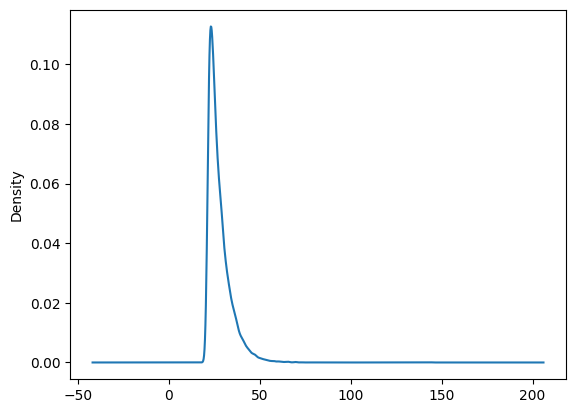

In [239]:
# Distribution Of person_age Feature using kde plot
df['person_age'].plot(kind='kde')

<Axes: >

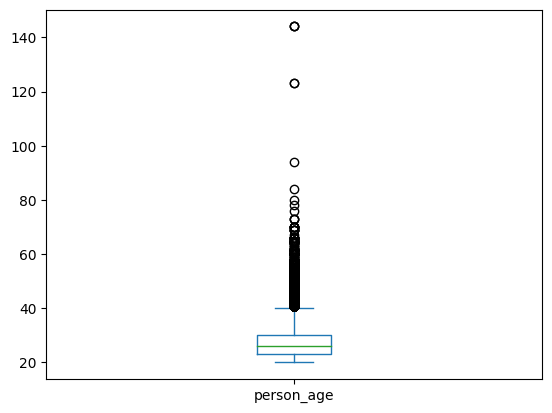

In [240]:
# Detecting the outliers using boxplot
df['person_age'].plot(kind='box')

### Outlier Treament  
Using 1.5 IQR rule

In [241]:
q3=df['person_age'].quantile(0.75)
q1=df['person_age'].quantile(0.25)
iqr=q3-q1
print("IQR : ",iqr)
lower=np.round(q1-1.5*(iqr))
print("Lower : ",lower)
upper=np.round(q3+1.5*(iqr))
print("Upper : ",upper)

IQR :  7.0
Lower :  12.0
Upper :  40.0


In [242]:
df[(df['person_age']>lower) & (df['person_age']<upper)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32288,38,99996,OWN,22.0,MEDICAL,D,25000,14.96,0,0.25,N,11
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
32292,38,200000,MORTGAGE,0.0,DEBTCONSOLIDATION,A,3000,7.68,0,0.01,N,12
32293,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13


### Treating outliers with map lambda function

In [243]:
df['person_age'] = df['person_age'].map(lambda age :upper if age >=upper else lower if age<=lower else age)

In [244]:
df['person_age'].dtypes

dtype('float64')

In [245]:
#convert the person_age Feature into integer by astype
df["person_age"]=df["person_age"].astype("int")

In [246]:
df['person_age'].dtypes

dtype('int64')

In [247]:
df['person_age'].value_counts()

23    3861
22    3607
24    3526
25    3023
26    2462
27    2127
28    1848
40    1761
29    1682
30    1310
21    1213
31    1139
32     961
33     855
34     708
35     619
36     547
37     478
38     373
39     301
20      15
Name: person_age, dtype: int64

In [248]:
df.shape

(32416, 12)

<Axes: >

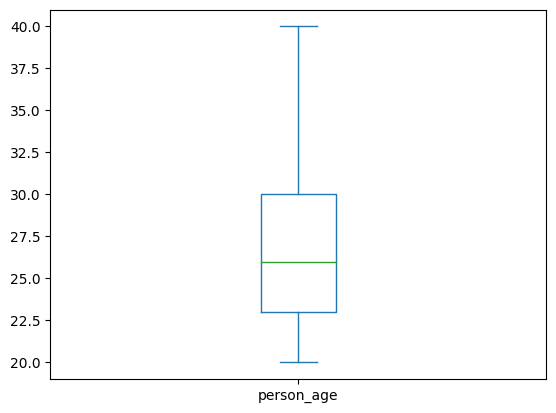

In [249]:
# checking the outliers using boxplot after Treatment..
df['person_age'].plot(kind='box')

### Analysing Person_income  feature

In [250]:
#Non_Visualization analysis
print("Minimum : ",df['person_income'].min())
print("Maxmum : ",df['person_income'].max())
print("Mean : ", df['person_income'].mean())
print("Median : ",df['person_income'].median())
print("STD : ", df['person_income'].std())

Minimum :  4000
Maxmum :  6000000
Mean :  66091.64082551826
Median :  55000.0
STD :  62015.5802688956


<Axes: ylabel='Density'>

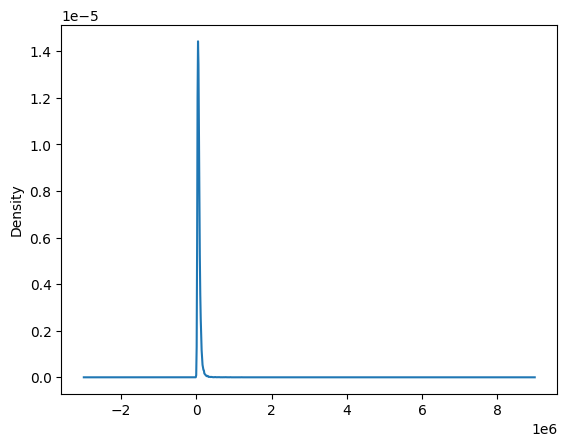

In [251]:
# Distribution Of person_income Feature using kde plot
df['person_income'].plot(kind='kde')

<Axes: >

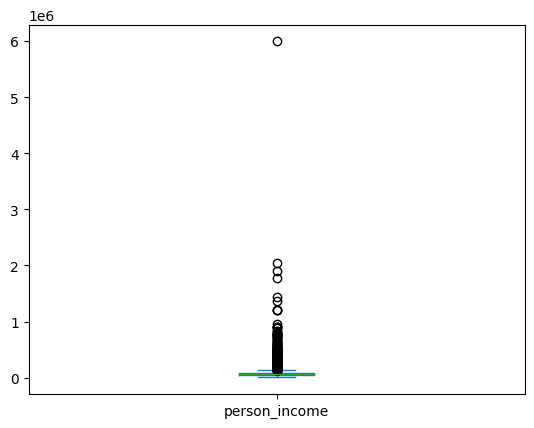

In [252]:
# checking the outliers using boxplot
df['person_income'].plot(kind='box')

### Outlier Treament  
Using 1.5 IQR rule

In [253]:
q3=df['person_income'].quantile(0.75)
q1=df['person_income'].quantile(0.25)
iqr=q3-q1
print("IQR : ",iqr)
lower_in=q1-1.5*(iqr)
print("Lower : ",lower_in)
upper_in=q3+1.5*(iqr)
print("Upper : ",upper_in)

IQR :  40676.0
Lower :  -22472.0
Upper :  140232.0


In [254]:
df[(df['person_income']>lower_in) & (df['person_income']<upper_in)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,40,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,40,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,40,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,40,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


In [255]:
df[df["person_income"]<lower_in]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


### Treating outliers with map lambda function

In [256]:
df['person_income'].map(lambda income :upper_in if income >=upper_in else lower_in if income<=lower_in else income).isna().sum()

0

In [257]:
df["person_income"]=df['person_income'].map(lambda income :upper_in if income >=upper_in else lower_in if income<=lower_in else income)

In [258]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40,53000.0,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,40,120000.0,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,40,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,40,140232.0,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


<Axes: >

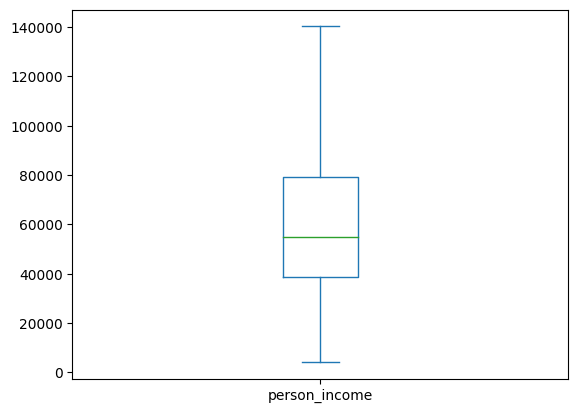

In [259]:
# checking the outliers using boxplot After outlier Treatment
df['person_income'].plot(kind='box')

In [260]:
df.shape

(32416, 12)

### Analysis on person_emp_length

In [261]:
#Non_Visualization analysis
print("Minimum : ",df['person_emp_length'].min())
print("Maxmum : ",df['person_emp_length'].max())
print("Mean : ", df['person_emp_length'].mean())
print("Median : ",df['person_emp_length'].median())
print("STD : ", df['person_emp_length'].std())

Minimum :  0.0
Maxmum :  123.0
Mean :  4.7688795656465945
Median :  4.0
STD :  4.090411377660598


<Axes: ylabel='Density'>

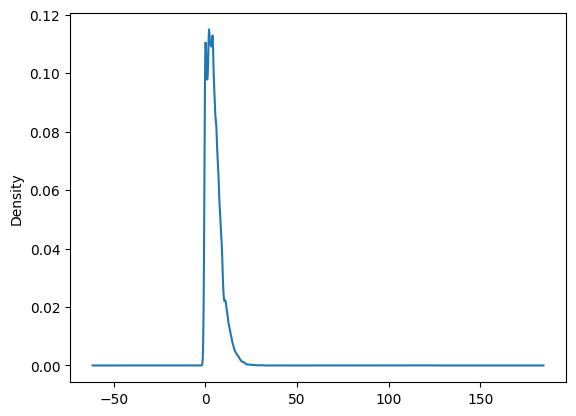

In [262]:
# Distribution Of person_emo_length Feature using kde plot
df['person_emp_length'].plot(kind='kde')

<Axes: >

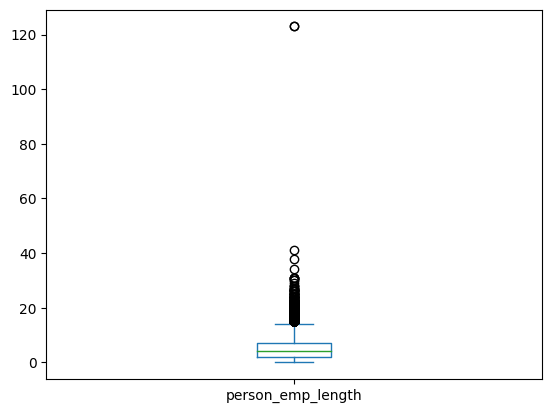

In [263]:
# checking the outliers using boxplot
df['person_emp_length'].plot(kind='box')

### Outlier Treament  
Using 1.5 IQR rule

In [264]:
q3=df['person_emp_length'].quantile(0.75)
q1=df['person_emp_length'].quantile(0.25)
iqr=q3-q1
print("IQR : ",iqr)
lower_lg=q1-1.5*(iqr)
print("Lower : ",lower_lg)
upper_lg=q3+1.5*(iqr)
print("Upper : ",upper_lg)

IQR :  5.0
Lower :  -5.5
Upper :  14.5


In [265]:
df[(df['person_emp_length']>lower_lg) & (df['person_emp_length']<upper_lg)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900.0,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40,53000.0,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,40,120000.0,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,40,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,40,140232.0,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Treating outliers with map lambda function

In [266]:
df['person_emp_length'].map(lambda length :upper_lg if length >=upper_lg else lower_lg if length<=lower_lg else length).isna().sum()

0

In [267]:
df['person_emp_length']=df['person_emp_length'].map(lambda length :upper_lg if length >=upper_lg else lower_lg if length<=lower_lg else length)

In [268]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,14.5,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40,53000.0,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,40,120000.0,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,40,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,40,140232.0,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [269]:
df.shape

(32416, 12)

<Axes: >

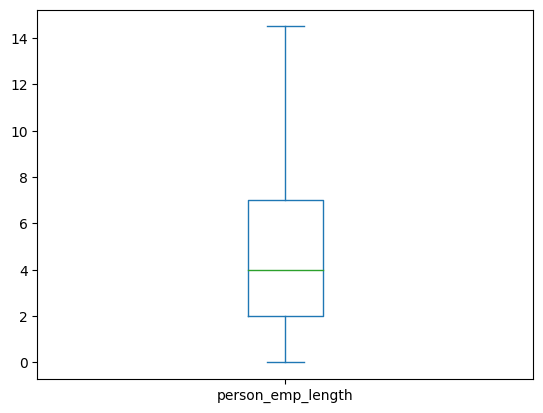

In [270]:
# checking the outliers using boxplot After Outlier Treatment
df['person_emp_length'].plot(kind='box')

### Analysis on loan_amnt Feature

In [271]:
#Non_Visualization analysis
print("Minimum : ",df['loan_amnt'].min())
print("Maxmum : ",df['loan_amnt'].max())
print("Mean : ", df['loan_amnt'].mean())
print("Median : ",df['loan_amnt'].median())
print("STD : ", df['loan_amnt'].std())

Minimum :  500
Maxmum :  35000
Mean :  9593.845631786771
Median :  8000.0
STD :  6322.730240861584


<Axes: ylabel='Density'>

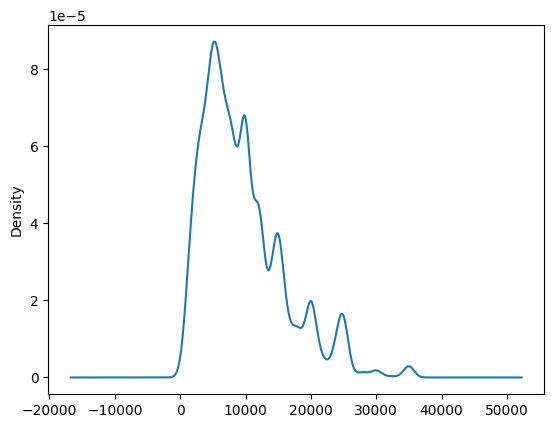

In [272]:
# Distribution Of person_emp_length Feature using kde plot
df['loan_amnt'].plot(kind='kde')

<Axes: >

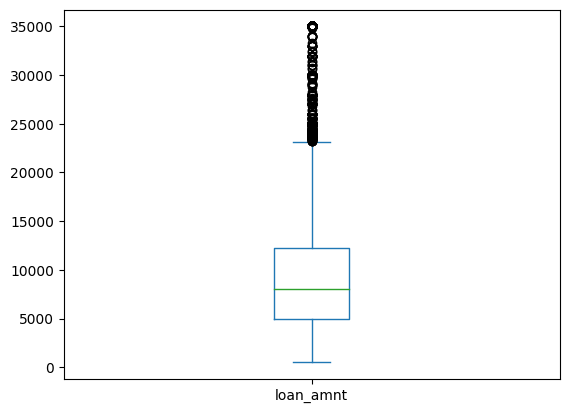

In [273]:
# checking the outliers using boxplot
df['loan_amnt'].plot(kind='box')

In [274]:
q3=df['loan_amnt'].quantile(0.75)
q1=df['loan_amnt'].quantile(0.25)
iqr=q3-q1
print("IQR : ",iqr)
lower_amt=q1-1.5*(iqr)
print("Lower : ",lower_amt)
upper_amt=q3+1.5*(iqr)
print("Upper : ",upper_amt)

IQR :  7250.0
Lower :  -5875.0
Upper :  23125.0


In [275]:
df[(df['loan_amnt']>lower_amt) & (df['loan_amnt']<upper_amt)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
5,21,9900.0,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000.0,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
11,21,10000.0,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,40,64500.0,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,40,53000.0,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,40,120000.0,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32579,40,140232.0,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Analysis on loan_int_rate

In [276]:
#Non_Visualization analysis
print("Minimum : ",df['loan_int_rate'].min())
print("Maxmum : ",df['loan_int_rate'].max())
print("Mean : ", df['loan_int_rate'].mean())
print("Median : ",df['loan_int_rate'].median())
print("STD : ", df['loan_int_rate'].std())

Minimum :  5.42
Maxmum :  23.22
Mean :  11.014661895360314
Median :  10.99
STD :  3.083050465962393


<Axes: ylabel='Density'>

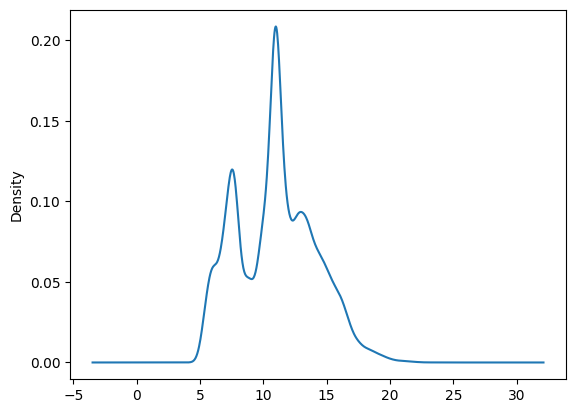

In [277]:
# Distribution Of loan_int_rate
df['loan_int_rate'].plot(kind='kde')

<Axes: >

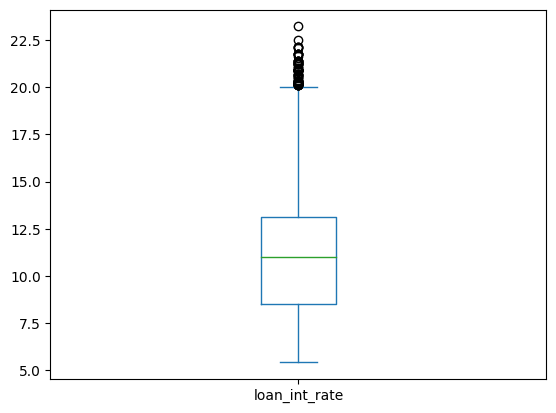

In [278]:
# checking the outliers using boxplot..
df['loan_int_rate'].plot(kind='box')

In [279]:
q3=df['loan_int_rate'].quantile(0.75)
q1=df['loan_int_rate'].quantile(0.25)
iqr=q3-q1
print("IQR : ",iqr)
lower_rate=q1-1.5*(iqr)
print("Lower : ",lower_rate)
upper_rate=q3+1.5*(iqr)
print("Upper : ",upper_rate)

IQR :  4.619999999999999
Lower :  1.5600000000000014
Upper :  20.04


In [280]:
df[(df['loan_int_rate']>lower_rate) & (df['loan_int_rate']<upper_rate)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,14.5,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40,53000.0,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,40,120000.0,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,40,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,40,140232.0,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Treating outliers with map lambda function

In [281]:
df['loan_int_rate']=df['loan_int_rate'].map(lambda rate :upper_rate if rate >=upper_rate else lower_rate if rate<=lower_rate else rate)

In [282]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,14.5,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40,53000.0,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,40,120000.0,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,40,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,40,140232.0,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [283]:
df.shape

(32416, 12)

### Analysis on loan_percent_income

In [284]:
#Non_Visualization analysis
print("Minimum : ",df['loan_percent_income'].min())
print("Maxmum : ",df['loan_percent_income'].max())
print("Mean : ", df['loan_percent_income'].mean())
print("Median : ",df['loan_percent_income'].median())
print("STD : ", df['loan_percent_income'].std())

Minimum :  0.0
Maxmum :  0.83
Mean :  0.1702498766041461
Median :  0.15
STD :  0.10681197337092514


<Axes: ylabel='Density'>

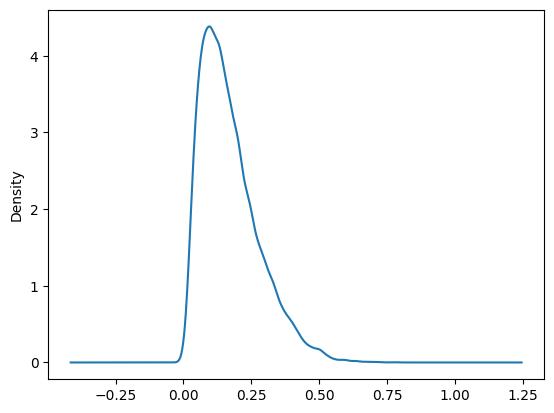

In [285]:
# Distribution Of loan_percent_income Feature using kde plot
df['loan_percent_income'].plot(kind='kde')

<Axes: >

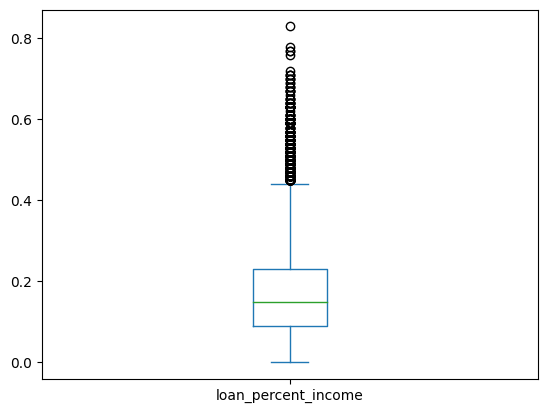

In [286]:
# checking the outliers using boxplot..
df['loan_percent_income'].plot(kind='box')

In [287]:
q1=df["loan_percent_income"].quantile(0.25)
q3=df["loan_percent_income"].quantile(0.75)
iqr=q3-q1
lower_per=q1-(1.5*iqr)
upper_per=q3+(1.5*iqr)
print(lower_per)
print(upper_per)

-0.12000000000000002
0.44000000000000006


In [288]:
df[(df['loan_percent_income']>lower_per) & (df['loan_percent_income']<upper_per)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900.0,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
7,24,78956.0,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000.0,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000.0,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,40,64500.0,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,40,53000.0,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,40,120000.0,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32579,40,140232.0,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Treating outliers with map lambda function

In [289]:
df['loan_percent_income'] = df['loan_percent_income'].map(lambda loan :upper_per if loan >=upper_per else lower_per if loan<=lower_per else loan)

<Axes: >

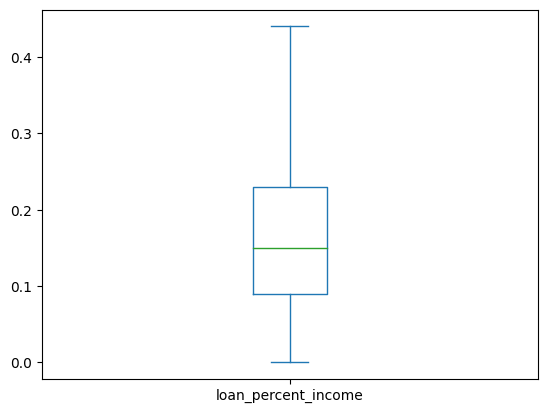

In [290]:
# checking the outliers using boxplot After Treatment..
df['loan_percent_income'].plot(kind='box')

### Analysis on cb_person_cred_hist length`

In [291]:
#Non_Visualization analysis
print("Minimum : ",df['cb_person_cred_hist_length'].min())
print("Maxmum : ",df['cb_person_cred_hist_length'].max())
print("Mean : ", df['cb_person_cred_hist_length'].mean())
print("Median : ",df['cb_person_cred_hist_length'].median())
print("STD : ", df['cb_person_cred_hist_length'].std())

Minimum :  2
Maxmum :  30
Mean :  5.811296890424482
Median :  4.0
STD :  4.059030349939308


<Axes: ylabel='Density'>

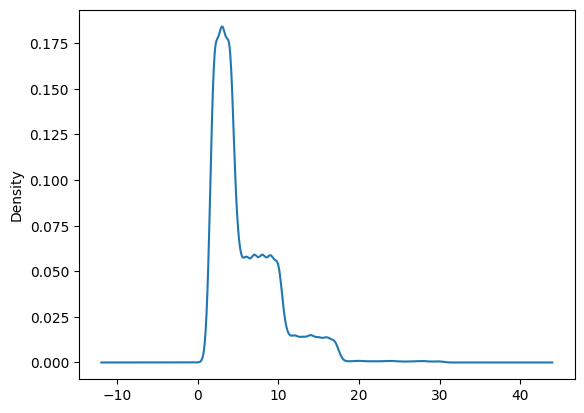

In [292]:
# Distribution Of loan_percent_income Feature using kde plot
df['cb_person_cred_hist_length'].plot(kind='kde')

<Axes: >

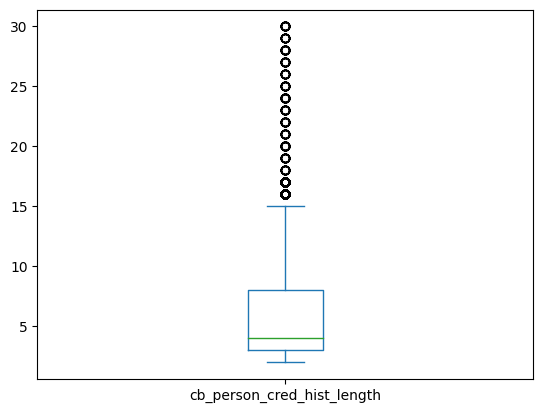

In [293]:
# checking the outliers using boxplot..
df['cb_person_cred_hist_length'].plot(kind='box')

In [294]:
q1=df["cb_person_cred_hist_length"].quantile(0.25)
q3=df["cb_person_cred_hist_length"].quantile(0.75)
iqr=q3-q1
lower_cre=q1-(1.5*iqr)
upper_cre=q3+(1.5*iqr)
print(iqr)
print(lower_cre)
print(upper_cre)

5.0
-4.5
15.5


In [295]:
df[(df['cb_person_cred_hist_length']>lower_cre) & (df['cb_person_cred_hist_length']<upper_cre)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,14.5,PERSONAL,D,35000,16.02,1,0.44,Y,3
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.44,N,3
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.44,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.44,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32290,37,90000.0,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
32292,38,140232.0,MORTGAGE,0.0,DEBTCONSOLIDATION,A,3000,7.68,0,0.01,N,12
32293,38,110000.0,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13
32294,36,92000.0,MORTGAGE,14.5,DEBTCONSOLIDATION,A,4000,7.29,0,0.04,N,13


### Treating outliers with map lambda function

In [296]:
df['cb_person_cred_hist_length']=df['cb_person_cred_hist_length'].map(lambda hist :upper_cre if hist >=upper_cre else lower_cre if hist<=lower_cre else hist)

In [297]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,14.5,PERSONAL,D,35000,16.02,1,0.44,Y,3.0
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2.0
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.44,N,3.0
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.44,N,2.0
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.44,Y,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40,53000.0,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,15.5
32577,40,120000.0,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,15.5
32578,40,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.44,N,15.5
32579,40,140232.0,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,15.5


<Axes: >

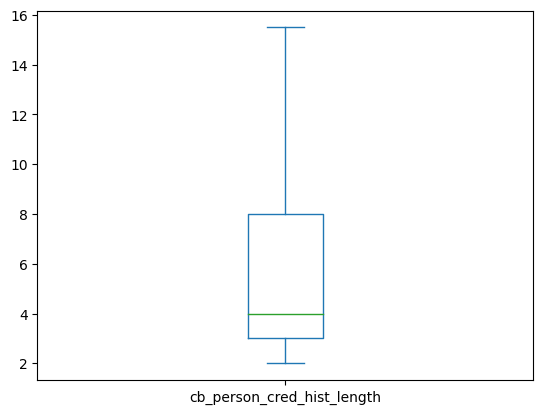

In [298]:
# checking the outliers using boxplot After Treatment..
df['cb_person_cred_hist_length'].plot(kind='box')

### Analysis on loan_status

In [299]:
#Non_Visualization analysis
print("Minimum : ",df['loan_status'].min())
print("Maxmum : ",df['loan_status'].max())
print("Mean : ", df['loan_status'].mean())
print("Median : ",df['loan_status'].median())
print("STD : ", df['loan_status'].std())

Minimum :  0
Maxmum :  1
Mean :  0.21868830207305034
Median :  0.0
STD :  0.4133630362538342


<Axes: ylabel='Density'>

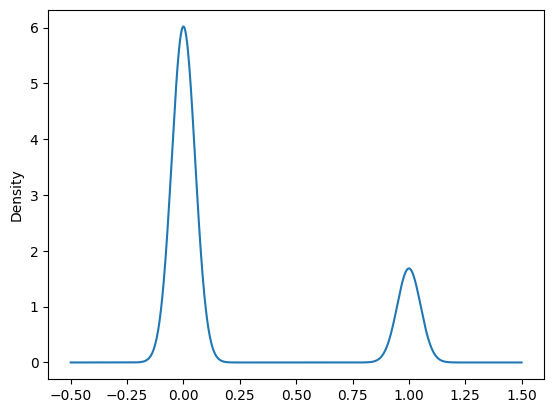

In [300]:
# Distribution Of loan_percent_income Feature using kde plot
df['loan_status'].plot(kind='kde')

<Axes: >

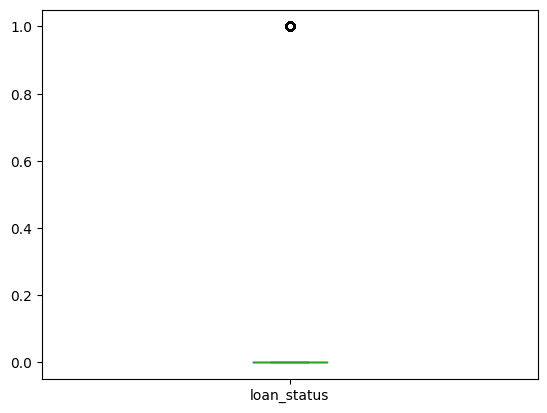

In [301]:
# checking the outliers using boxplot..
df['loan_status'].plot(kind='box')

### Analysis on person_home_ownership

In [302]:
# getting value_counts()
df['person_home_ownership'].value_counts()

RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: person_home_ownership, dtype: int64

In [303]:
# getting value_counts() by normalization
df['person_home_ownership'].value_counts(normalize = True)

RENT        0.505244
MORTGAGE    0.412420
OWN         0.079066
OTHER       0.003270
Name: person_home_ownership, dtype: float64

<Axes: >

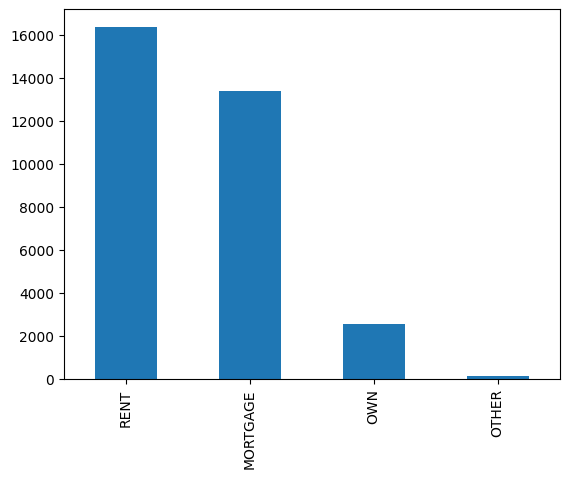

In [304]:
# Plotting barplot for person_home_ownership feature
df['person_home_ownership'].value_counts().plot(kind = 'bar')

### Analysis on loan_intent


In [305]:
# getting value_counts()
df['loan_intent'].value_counts()

EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: loan_intent, dtype: int64

In [306]:
# getting value_counts() by normalization
df['loan_intent'].value_counts(normalize = True)

EDUCATION            0.197773
MEDICAL              0.186389
VENTURE              0.175284
PERSONAL             0.169608
DEBTCONSOLIDATION    0.160075
HOMEIMPROVEMENT      0.110871
Name: loan_intent, dtype: float64

<Axes: >

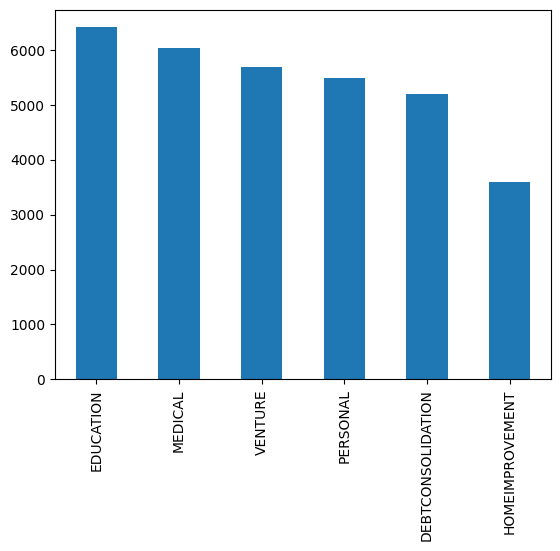

In [307]:
# Plotting barplot for loan_intent feature
df['loan_intent'].value_counts().plot(kind = 'bar')

### Analysis on loan_grade

In [308]:
# getting value_counts()
df['loan_grade'].value_counts()

A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: loan_grade, dtype: int64

In [309]:
# getting value_counts() by normalization
df['loan_grade'].value_counts(normalize = True)

A    0.330176
B    0.320428
C    0.198606
D    0.111673
E    0.029708
F    0.007435
G    0.001974
Name: loan_grade, dtype: float64

<Axes: >

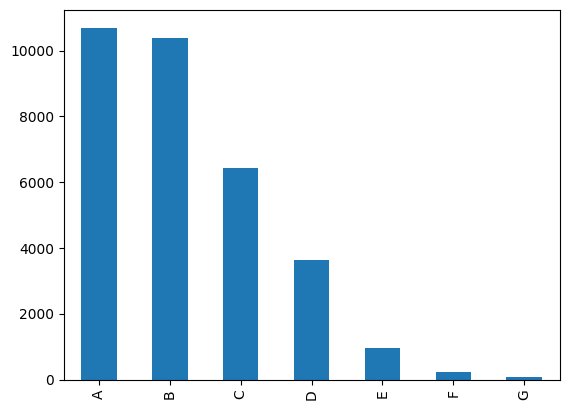

In [310]:
# Plotting barplot for loan_grade feature
df['loan_grade'].value_counts().plot(kind = 'bar')

### Analysis on cb_person_default_on_file

In [311]:
# getting value_counts()
df['cb_person_default_on_file'].value_counts()

N    26686
Y     5730
Name: cb_person_default_on_file, dtype: int64

In [312]:
# getting value_counts() by normalization
df['cb_person_default_on_file'].value_counts(normalize = True)

N    0.823235
Y    0.176765
Name: cb_person_default_on_file, dtype: float64

<Axes: >

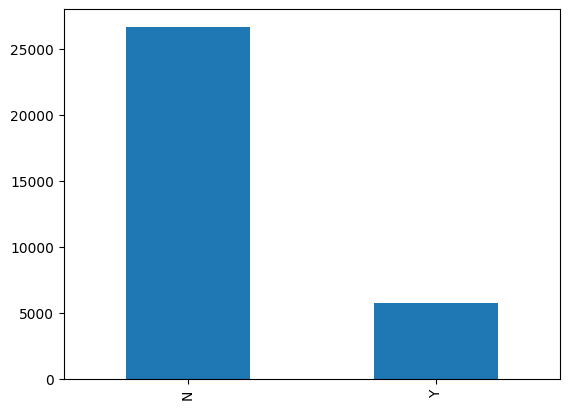

In [313]:
# Plotting barplot for loan_intent feature
df['cb_person_default_on_file'].value_counts().plot(kind = 'bar')

### Bi-variate Analysis Num vs Num


### Analysis on Retaionship Between person_income and loan_amount

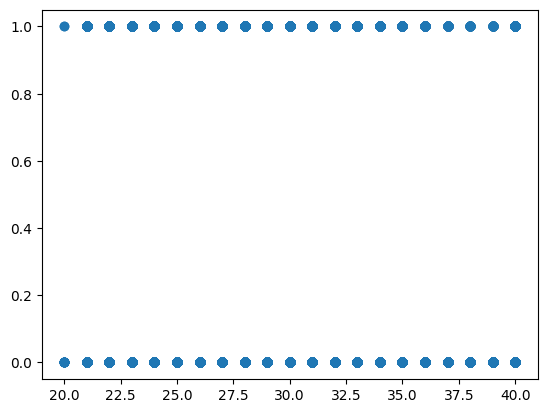

In [314]:
plt.scatter(x = df['person_age'],y = df['loan_status'])
plt.show()

### Analysis the relationship between the person_income and loan_status Feature

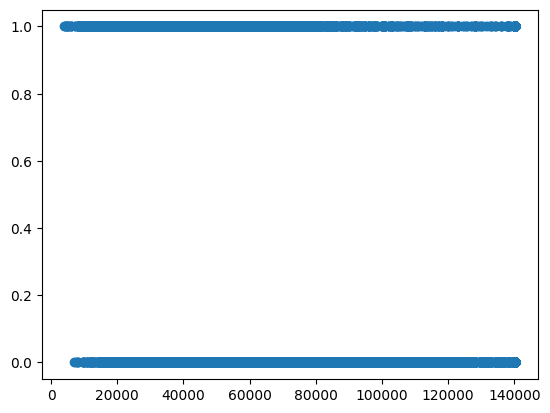

In [315]:
plt.scatter(x = df['person_income'],y = df['loan_status'])
plt.show()

### Analysis the relationship between the person_income and loan_percent income

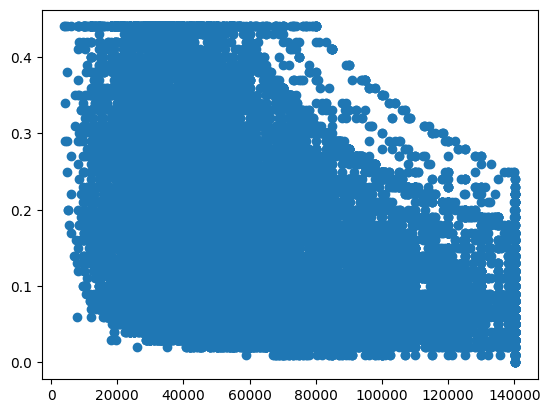

In [316]:
plt.scatter(x = df['person_income'],y = df['loan_percent_income'])
plt.show()

### Analysis the relationship between the person_emp_length and loan_status

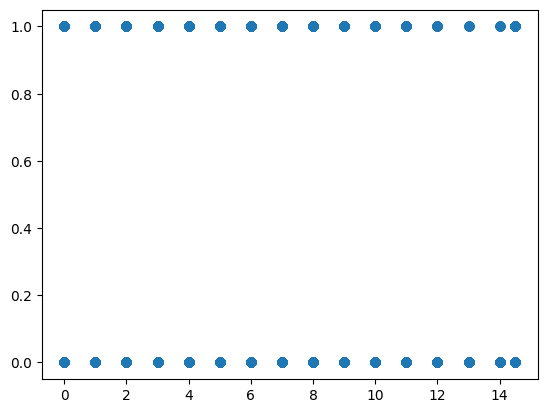

In [317]:
plt.scatter(x = df['person_emp_length'],y = df['loan_status'])
plt.show()

### Analysis_on relationship between the loan_amnt and laon_status

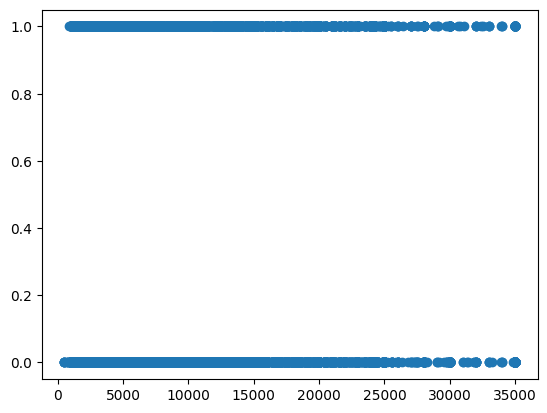

In [318]:
plt.scatter(x = df['loan_amnt'],y = df['loan_status'])
plt.show()

### Analysis_on relationship between the loan_int_rate and laon_status

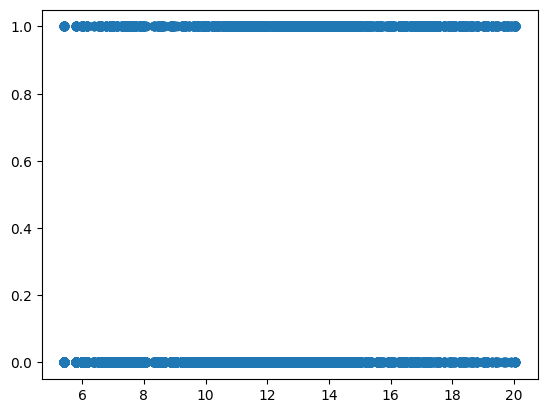

In [319]:
plt.scatter(x = df['loan_int_rate'],y = df['loan_status'])
plt.show()

### Analysis_on relationship between the cb_person_cred_hist_length and laon_status

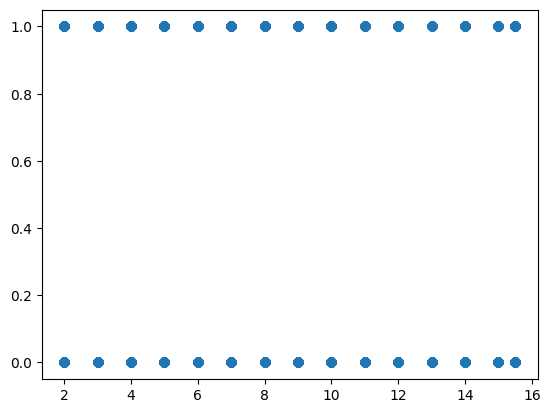

In [320]:
plt.scatter(x = df['cb_person_cred_hist_length'],y = df['loan_status'])
plt.show()

### Analysis_on relationship between the person_home_ownership and laon_amnt

<Axes: xlabel='person_home_ownership', ylabel='loan_amnt'>

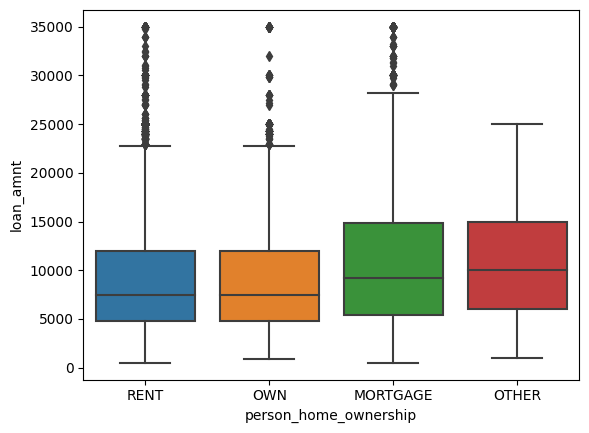

In [321]:
sns.boxplot(data=df,x=df["person_home_ownership"],y=df["loan_amnt"])

### Analysis on relationship between the loan_intent and loan_status

<Axes: xlabel='loan_intent', ylabel='loan_status'>

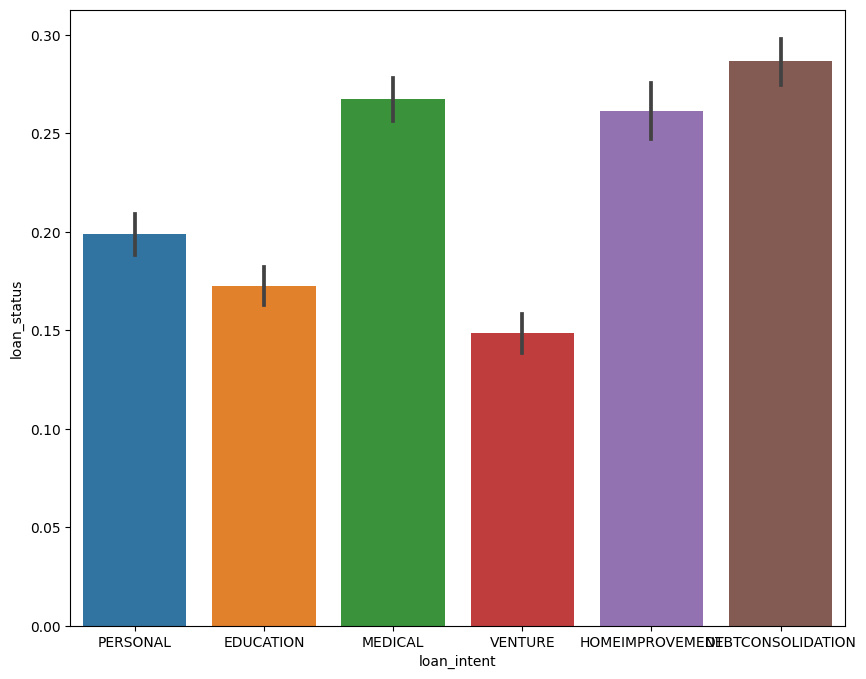

In [322]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x=df["loan_intent"],y=df["loan_status"])

### Analysis on relationship B/w loan_grade and Loan_status

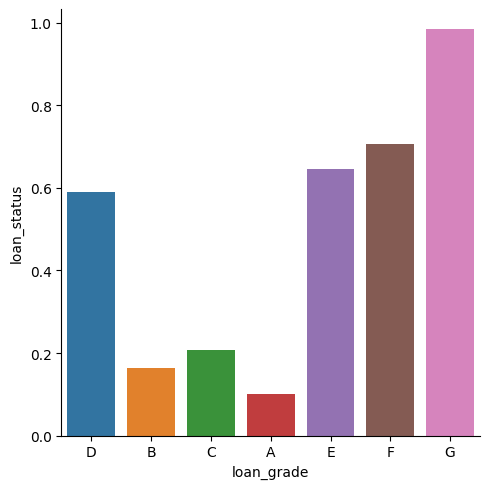

In [323]:
sns.catplot(data=df,x="loan_grade",y="loan_status",kind="bar",ci=None)

### Analysis on the relationship b/w laon_status and person_home_owenrship

<Axes: xlabel='loan_status'>

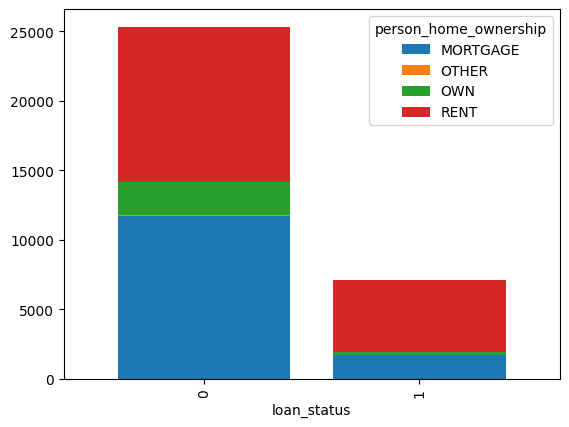

In [324]:
pd.crosstab(df["loan_status"],df["person_home_ownership"]).plot(kind="bar",width=0.8,stacked=True)

### Analysis on relationship between the loan_status and Loan_intent

<Axes: xlabel='loan_status'>

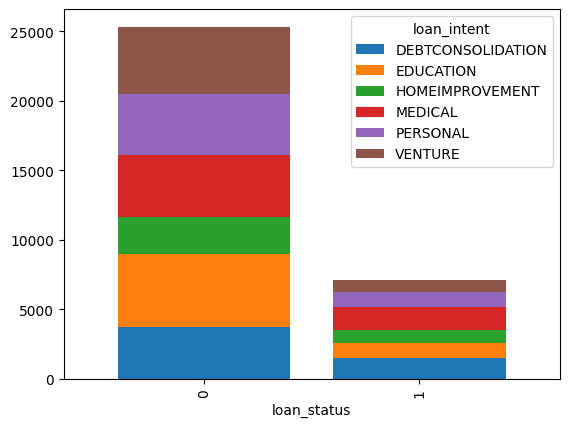

In [325]:
pd.crosstab(df["loan_status"],df["loan_intent"]).plot(kind="bar",width=0.8,stacked=True)

### Analysis on relation betweeen loan_status and loan_grade

<Axes: xlabel='loan_status'>

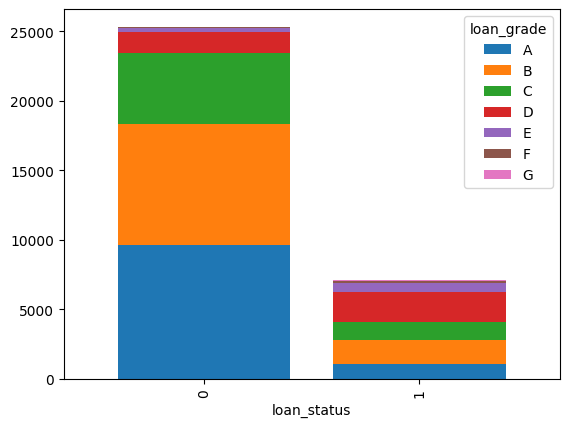

In [326]:
pd.crosstab(df["loan_status"],df["loan_grade"]).plot(kind="bar",width=0.8,stacked=True)

### Analysis the relatioship Between the cb_person_default and loan_status

<Axes: xlabel='loan_status'>

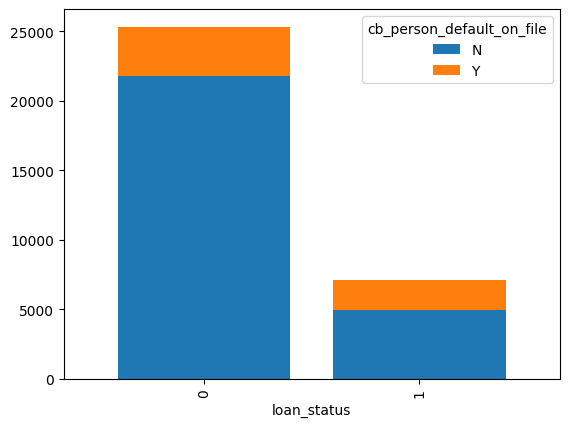

In [327]:
pd.crosstab(df["loan_status"],df["cb_person_default_on_file"]).plot(kind="bar",width=0.8,stacked=True)

### Multi_Variate Anlysis

<Axes: >

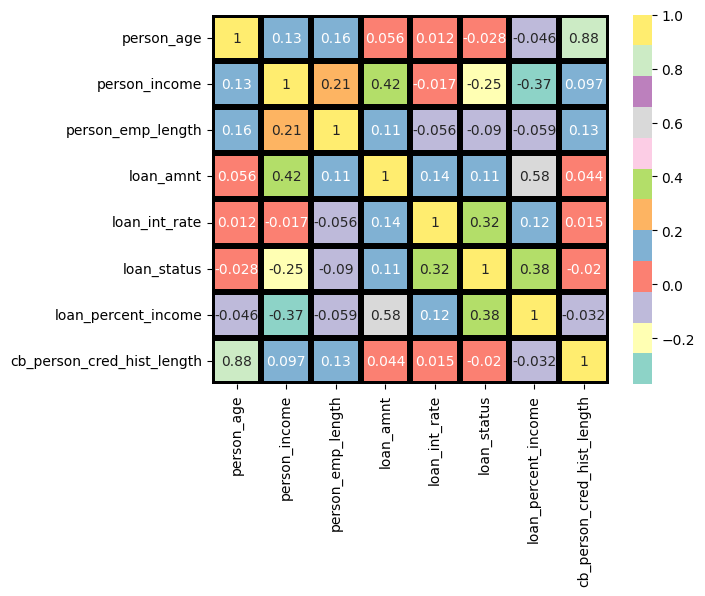

In [328]:
sns.heatmap(df.corr(),annot=True,cmap="Set3",linecolor="black",linewidth=4)

## Data preparation and Model buliding

## Identify the Target Variable and Splitting the Data into Train and Test

In [329]:
X = df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate','loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]

In [330]:
y = df["loan_status"]

In [331]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.75, random_state=42)

In [332]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
27424,33,21000.0,OWN,1.0,EDUCATION,B,7750,11.83,0.37,N,6.0
4191,24,40000.0,MORTGAGE,6.0,DEBTCONSOLIDATION,B,5000,11.11,0.13,N,2.0
10768,22,40000.0,RENT,2.0,EDUCATION,A,10000,7.14,0.25,N,4.0
27220,30,126132.0,MORTGAGE,1.0,VENTURE,D,14400,14.54,0.11,Y,7.0
10250,23,66000.0,MORTGAGE,7.0,PERSONAL,B,10000,9.63,0.15,N,4.0


In [333]:

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24312, 11) (24312,)
(8104, 11) (8104,)


## Separating Categorical and Numerical Columns

In [334]:
X_train_cat = X_train.select_dtypes(include=['object'])

In [335]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
27424,OWN,EDUCATION,B,N
4191,MORTGAGE,DEBTCONSOLIDATION,B,N
10768,RENT,EDUCATION,A,N
27220,MORTGAGE,VENTURE,D,Y
10250,MORTGAGE,PERSONAL,B,N


In [336]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [337]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
27424,33,21000.0,1.0,7750,11.83,0.37,6.0
4191,24,40000.0,6.0,5000,11.11,0.13,2.0
10768,22,40000.0,2.0,10000,7.14,0.25,4.0
27220,30,126132.0,1.0,14400,14.54,0.11,7.0
10250,23,66000.0,7.0,10000,9.63,0.15,4.0


## Scaling the Numerical Features

In [338]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns = X_train_num.columns,
                                    index = X_train_num.index)


In [339]:
X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
27424,1.070757,-1.302019,-0.990257,-0.290915,0.263555,1.952748,0.078460
4191,-0.656919,-0.703156,0.362347,-0.727111,0.028542,-0.382998,-1.000765
10768,-1.040847,-0.703156,-0.719737,0.065972,-1.267289,0.784875,-0.461152
27220,0.494865,2.011647,-0.990257,0.763885,1.148114,-0.577644,0.348267
10250,-0.848883,0.116340,0.632868,0.065972,-0.454538,-0.188353,-0.461152


In [340]:
X_train_cat_o = X_train_cat [['person_home_ownership',	'loan_intent'	,	'cb_person_default_on_file']]

In [341]:
X_train_cat_o.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
27424,OWN,EDUCATION,N
4191,MORTGAGE,DEBTCONSOLIDATION,N
10768,RENT,EDUCATION,N
27220,MORTGAGE,VENTURE,Y
10250,MORTGAGE,PERSONAL,N


In [342]:
X_train_cat_l = X_train_cat[['loan_grade']]

In [343]:
X_train_cat_l

,loan_grade
27424,B
4191,B
10768,A
27220,D
10250,B
...,...
29961,C
5390,A
860,E
15795,C


## Applying one hot Encoding on Categorical Columns

In [344]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = "first",sparse = False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat_o),
                               columns=encoder.get_feature_names_out(X_train_cat_o.columns),
                               index = X_train_cat_o.index)

X_train_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
27424,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10768,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
27220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
10250,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Applying Label Encoding on Categorical Columns

In [345]:
X_train_cat_l = X_train_cat["loan_grade"]

In [346]:
X_train_cat_le = pd.DataFrame(index=X_train_cat_l.index)

X_train_cat_le.head()

""
27424
4191
10768
27220
10250


In [347]:
X_train_cat_l.unique()

array(['B', 'A', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [348]:
grade_encoder = {'G' : 1, 'F' : 2, 'E' : 3, 'D' : 4, 'C' : 5, 'B' : 6, 'A' : 7}

In [349]:


X_train_cat_le['loan_grade'] = X_train_cat_l.apply(lambda x : grade_encoder[x])

X_train_cat_le.head()

,loan_grade
27424,6
4191,6
10768,7
27220,4
10250,6


##  Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [350]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_ohe, X_train_cat_le], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
27424,1.070757,-1.302019,-0.990257,-0.290915,0.263555,1.952748,0.078460,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
4191,-0.656919,-0.703156,0.362347,-0.727111,0.028542,-0.382998,-1.000765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
10768,-1.040847,-0.703156,-0.719737,0.065972,-1.267289,0.784875,-0.461152,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7
27220,0.494865,2.011647,-0.990257,0.763885,1.148114,-0.577644,0.348267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4
10250,-0.848883,0.116340,0.632868,0.065972,-0.454538,-0.188353,-0.461152,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6


## Preparing Test Data

In [351]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
20562,31,100000.0,RENT,2.0,VENTURE,A,10000,8.49,0.10,N,5.0
1090,21,37232.0,RENT,3.0,MEDICAL,B,17500,12.53,0.44,N,2.0
4762,22,31000.0,RENT,2.0,MEDICAL,B,5000,10.62,0.16,N,4.0
12381,22,40000.0,RENT,2.0,DEBTCONSOLIDATION,B,12000,10.99,0.30,N,2.0
15112,23,122000.0,MORTGAGE,5.0,PERSONAL,A,12000,7.29,0.10,N,3.0


In [352]:
X_test_num = X_test.select_dtypes(exclude=['object'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
20562,31,100000.0,2.0,10000,8.49,0.10,5.0
1090,21,37232.0,3.0,17500,12.53,0.44,2.0
4762,22,31000.0,2.0,5000,10.62,0.16,4.0
12381,22,40000.0,2.0,12000,10.99,0.30,2.0
15112,23,122000.0,5.0,12000,7.29,0.10,3.0


## Scaling the Numerical Features

In [353]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                    columns = X_test_num.columns,
                                    index = X_test_num.index)
X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
20562,0.686829,1.187990,-0.719737,0.065972,-0.826641,-0.674966,-0.191346
1090,-1.232811,-0.790401,-0.449216,1.255597,0.492039,2.634007,-1.000765
4762,-1.040847,-0.986828,-0.719737,-0.727111,-0.131396,-0.091030,-0.461152
12381,-1.040847,-0.703156,-0.719737,0.383205,-0.010626,1.271488,-1.000765
15112,-0.848883,1.881410,0.091826,0.383205,-1.218328,-0.674966,-0.730958


In [354]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
20562,RENT,VENTURE,A,N
1090,RENT,MEDICAL,B,N
4762,RENT,MEDICAL,B,N
12381,RENT,DEBTCONSOLIDATION,B,N
15112,MORTGAGE,PERSONAL,A,N


In [355]:
X_test_cat_o = X_test_cat [['person_home_ownership',	'loan_intent'	,	'cb_person_default_on_file']]

In [356]:
X_test_cat_o.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
20562,RENT,VENTURE,N
1090,RENT,MEDICAL,N
4762,RENT,MEDICAL,N
12381,RENT,DEBTCONSOLIDATION,N
15112,MORTGAGE,PERSONAL,N


In [357]:
X_test_cat_l = X_test_cat[['loan_grade']]

In [358]:
X_test_cat_l

,loan_grade
20562,A
1090,B
4762,B
12381,B
15112,A
...,...
29094,A
14213,C
23154,A
5194,C


## Applying one hot Encoding on Categorical Columns

In [359]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat_o),
                               columns=encoder.get_feature_names_out(X_test_cat_o.columns),
                               index = X_test_cat_o.index)

X_test_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
20562,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1090,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4762,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12381,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15112,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Applying Label Encoding on Categorical Columns

In [360]:
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)

X_test_cat_le.head()

""
20562
1090
4762
12381
15112


In [361]:
grade_encoder = {'G' : 1, 'F' : 2, 'E' : 3, 'D' : 4, 'C' : 5, 'B' : 6, 'A' : 7}

In [362]:
grade_encoder = {'G' : 1, 'F' : 2, 'E' : 3, 'D' : 4, 'C' : 5, 'B' : 6, 'A' : 7}
X_test_cat_le['loan_grade'] = X_test_cat_l["loan_grade"].apply(lambda x : grade_encoder[x])
X_test_cat_le.head()

,loan_grade
20562,7
1090,6
4762,6
12381,6
15112,7


In [363]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_ohe, X_test_cat_le], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
20562,0.686829,1.187990,-0.719737,0.065972,-0.826641,-0.674966,-0.191346,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7
1090,-1.232811,-0.790401,-0.449216,1.255597,0.492039,2.634007,-1.000765,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6
4762,-1.040847,-0.986828,-0.719737,-0.727111,-0.131396,-0.091030,-0.461152,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6
12381,-1.040847,-0.703156,-0.719737,0.383205,-0.010626,1.271488,-1.000765,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6
15112,-0.848883,1.881410,0.091826,0.383205,-1.218328,-0.674966,-0.730958,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7


## Prediction and evaluation

## LogisticRegression

In [364]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)


LogisticRegression()

In [365]:
y_test_pred = classifier.predict(X_test_transformed)

In [366]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred)

0.8509378084896347

<Axes: xlabel='loan_status', ylabel='Count'>

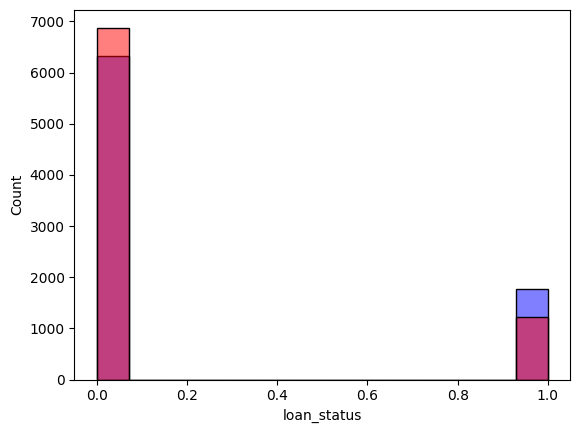

In [367]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

## KNN

In [368]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed,y_train)


KNeighborsClassifier()

In [369]:
y_test_pred = classifier.predict(X_test_transformed)
metrics.accuracy_score(y_test,y_test_pred)

0.8923988153998026

<Axes: xlabel='loan_status', ylabel='Count'>

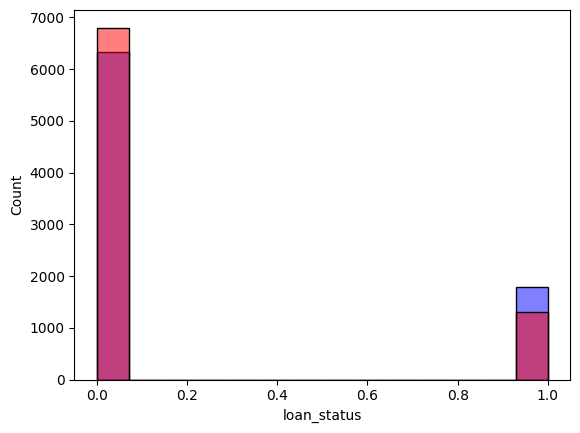

In [370]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

##  Support Vector Machines


In [371]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [372]:
y_test_pred = classifier.predict(X_test_transformed)
metrics.accuracy_score(y_test,y_test_pred)

0.8963474827245804

<Axes: xlabel='loan_status', ylabel='Count'>

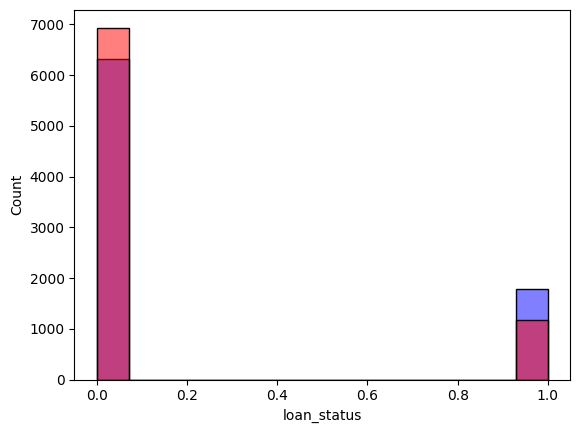

In [373]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

## RandomForestClassifier

In [382]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [383]:
y_test_pred = classifier.predict(X_test_transformed)
metrics.accuracy_score(y_test,y_test_pred)

0.9338598223099703

<Axes: xlabel='loan_status', ylabel='Count'>

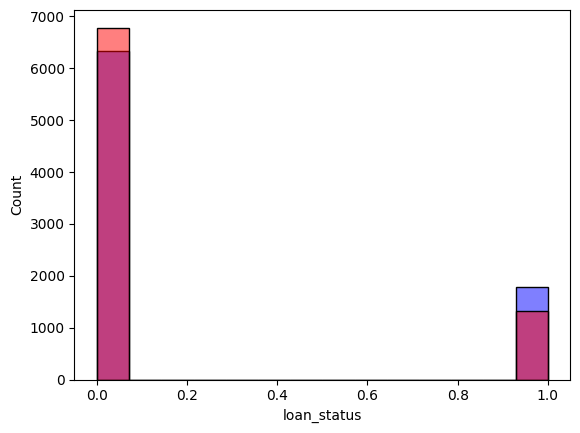

In [381]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

## DecisionTreeClassifier

In [377]:

from sklearn.tree import DecisionTreeClassifier
tree =  DecisionTreeClassifier()
tree.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [378]:
y_test_pred = classifier.predict(X_test_transformed)
metrics.accuracy_score(y_test,y_test_pred)

0.9343534057255676

<Axes: xlabel='loan_status', ylabel='Count'>

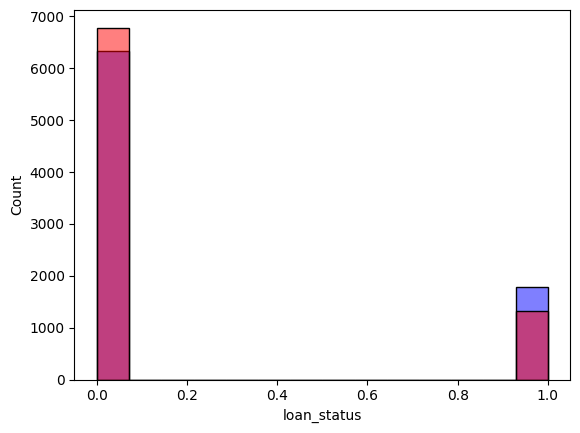

In [379]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

## Conclusion

##### From above prediction DecisionTree algorithm has good prediction compare to all other algorithm for Credit Risk Scoring.

